# **<h1>GLCM Depth Classifier using GradientBoostingClassifier**



**For training model from scratch:**


1. Download Dependencies
2. Load Dataset from Repo
3. Setup Imports
4. Configure Dataset for Training Setup
5. Initialize Model for Training
6. Post-training Model Evaluation
7. Save Model Weights


**For evaluating Pre-trained model:**


1. Download Dependencies
2. Load Dataset from Repo
3. Setup Imports
4. Model Testing using Pre-Trained Model Weights


# **==================Update GLCM Classifier Package==================**

In [31]:
# Remove the existing repository folder (if it exists) and re-clone the repository
!rm -rf GLCM-Classifier

In [32]:
!git clone https://github.com/SSSerpenttt/GLCM-Classifier.git

Cloning into 'GLCM-Classifier'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 229 (delta 6), reused 8 (delta 3), pack-reused 217 (from 1)
Receiving objects: 100% (229/229), 51.76 KiB | 3.98 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [33]:
src_path = Path('/content/GLCM-Classifier/src')
if src_path.exists():
    sys.path.append(str(src_path))

from utils.data_loader import load_data
from config import Config
from glcm_model import GLCMModel

# **==================Download Dependencies==================**

In [1]:
!git clone https://github.com/SSSerpenttt/GLCM-Classifier.git

Cloning into 'GLCM-Classifier'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 277 (delta 42), reused 39 (delta 21), pack-reused 217 (from 1)
Receiving objects: 100% (277/277), 58.72 KiB | 1.20 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [2]:
!pip install -r /content/GLCM-Classifier/requirements.txt

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of scikit-image to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

# **==================Load Dataset from Repo==================**

In [1]:
!git clone --branch master https://github.com/SSSerpenttt/GroupEGS-Thesis-Dataset.git

Cloning into 'GroupEGS-Thesis-Dataset'...
remote: Enumerating objects: 2554, done.
remote: Total 2554 (delta 0), reused 0 (delta 0), pack-reused 2554 (from 2)
Receiving objects: 100% (2554/2554), 200.78 MiB | 25.01 MiB/s, done.
Updating files: 100% (2546/2546), done.


# **Setup Imports**

In [2]:
import sys
from pathlib import Path

In [3]:
import tensorflow as tf
import numpy as np
import sklearn
import pandas as pd
import matplotlib
import cv2
import scipy

In [4]:
src_path = Path('/content/GLCM-Classifier/src')
if src_path.exists():
    sys.path.append(str(src_path))

from utils.data_loader import load_data
from config import Config
from glcm_model import GLCMModel

# **Configure Dataset for Training Setup**

In [5]:
# Create a configuration object
config = Config(
    epochs=20,
    data_path="/content/GroupEGS-Thesis-Dataset",  # Colab path
)

# Load data
data = load_data(config.data_path, include_labels=["depth-deep", "depth-shallow"])


train_data = data["train_data"]
val_data = data["val_data"]
test_data = data["test_data"]
print("Data loaded successfully.")

print("Sample ROIs:", train_data["rois"][:5])
print("Training Labels:", np.unique(train_data["labels"]))
print("Validation Labels:", np.unique(val_data["labels"]))
print("Test Labels:", np.unique(test_data["labels"]))

Data loaded successfully.
Sample ROIs: [[[60, 0, 124, 178], [392, 415, 182, 178]], [[11, 571, 542, 299], [658, 155, 113, 41]], [[379, 417, 284, 477], [388, 416, 170, 111], [0, 407, 319, 61], [310, 357, 104, 135]], [[6, 329, 789, 562]], [[188, 375, 679, 326]]]
Training Labels: [list(['depth-deep']) list(['depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-shallow'])
 list(['depth-deep'

/usr/local/lib/python3.11/dist-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


## **Configuration Checks**

In [6]:
# Check the keys
print("Train keys:", train_data.keys())
print("Validation keys:", val_data.keys())
print("Test keys:", test_data.keys())

# Check shapes
print("Train images shape:", train_data["images"].shape)
print("Train labels length:", len(train_data["labels"]))  # Use len() for lists
print("Train ROIs length:", len(train_data["rois"]))      # Use len() for lists

print("Validation images shape:", val_data["images"].shape)
print("Validation labels length:", len(val_data["labels"]))  # Use len() for lists
print("Validation ROIs length:", len(val_data["rois"]))      # Use len() for lists

print("Test images shape:", test_data["images"].shape)
print("Test labels length:", len(test_data["labels"]))  # Use len() for lists
print("Test ROIs length:", len(test_data["rois"]))      # Use len() for lists)

Train keys: dict_keys(['images', 'labels', 'rois'])
Validation keys: dict_keys(['images', 'labels', 'rois'])
Test keys: dict_keys(['images', 'labels', 'rois'])
Train images shape: (1762, 896, 896)
Train labels length: 1762
Train ROIs length: 1762
Validation images shape: (524, 896, 896)
Validation labels length: 524
Validation ROIs length: 524
Test images shape: (251, 896, 896)
Test labels length: 251
Test ROIs length: 251


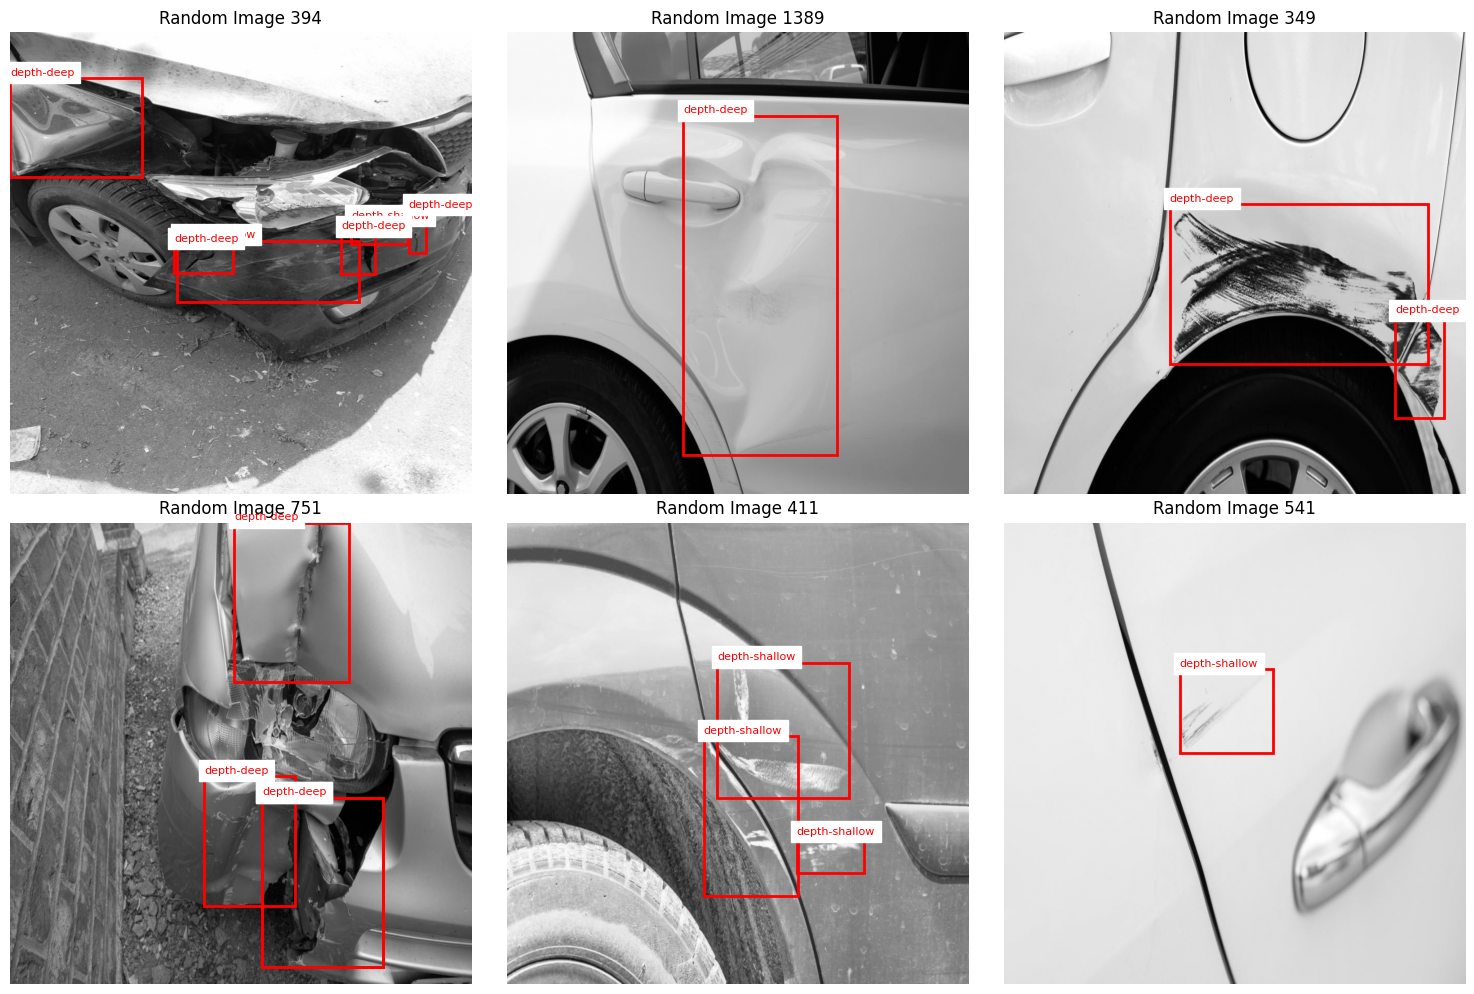

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Function to display an image with its ROIs and labels
def display_image_with_rois(image, rois, labels, ax):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    for bbox, label in zip(rois, labels):
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y - 5, label, color='red', fontsize=8, backgroundcolor='white')

# 🔢 Number of images to display (change as needed)
num_samples = 6

# Randomly select indices from the training data
num_images = len(train_data["images"])
sample_indices = random.sample(range(num_images), min(num_samples, num_images))

# Create subplots
cols = 3
rows = (len(sample_indices) + cols - 1) // cols  # ceiling division
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten axes if it's 2D
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Display images
for i, idx in enumerate(sample_indices):
    display_image_with_rois(
        train_data["images"][idx],
        train_data["rois"][idx],
        train_data["labels"][idx],
        axes[i]
    )
    axes[i].set_title(f"Random Image {idx}")

# Hide any unused axes
for j in range(len(sample_indices), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [8]:
# Check the format of the labels
print("Checking label formats...")

# Convert labels to NumPy arrays
train_labels = np.array(train_data["labels"])
val_labels = np.array(val_data["labels"])

# Check the format of the labels
print("Checking label formats...")

# Check training labels
print("Training labels:")
print(f"Shape: {train_labels.shape}")
print(f"Sample: {train_labels[:5]}")  # Print the first 5 labels

# Check validation labels
print("\nValidation labels:")
print(f"Shape: {val_labels.shape}")
print(f"Sample: {val_labels[:5]}")  # Print the first 5 labels

# Check if labels are 1D or 2D
if len(train_labels.shape) > 1:
    print("\nTraining labels are 2D. You may need to flatten them.")
else:
    print("\nTraining labels are 1D. Format is correct.")

if len(val_labels.shape) > 1:
    print("Validation labels are 2D. You may need to flatten them.")
else:
    print("Validation labels are 1D. Format is correct.")

Checking label formats...
Checking label formats...
Training labels:
Shape: (1762,)
Sample: [list(['depth-shallow', 'depth-shallow'])
 list(['depth-shallow', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-shallow', 'depth-shallow'])
 list(['depth-deep']) list(['depth-shallow'])]

Validation labels:
Shape: (524,)
Sample: [list(['depth-deep']) list(['depth-shallow', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-shallow', 'depth-shallow', 'depth-shallow'])]

Training labels are 1D. Format is correct.
Validation labels are 1D. Format is correct.


<ipython-input-8-24ce7e47ba1a>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_labels = np.array(train_data["labels"])
<ipython-input-8-24ce7e47ba1a>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val_labels = np.array(val_data["labels"])


# **Initialize Model for Training**

In [9]:
# Initialize model and data loader
model = GLCMModel(config)
print("Model configured successfully.")

Model configured successfully.


In [10]:
config.display()

Configuration Settings:
Dataset Path: /content/GroupEGS-Thesis-Dataset
Model Parameters: {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 4, 'random_state': 42, 'class_weight': 'balanced'}
Distances: [1, 2, 3, 4, 5]
Angles: [0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
Levels: 256
Number of Epochs: 20
Early Stopping Rounds: 10
Logging Level: INFO


In [11]:
print(f"Early Stopping Rounds: {model.config.early_stopping_rounds}")
print(f"Model Parameters: {model.model.get_params()}")

Early Stopping Rounds: 10
Model Parameters: {'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 300, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [12]:
print(f"Original labels shape: {len(train_data['labels'])}")
print(f"Processed labels shape: {train_labels.shape}")

Original labels shape: 1762
Processed labels shape: (1762,)


In [13]:
# Train the model
print("Starting training...")
model.train(train_data, val_data)
print("Training completed.")

Starting training...
Extracting GLCM features for training data...
Number of training images: 1762
Number of training ROIs: 4167


Training GLCM Extraction: 100%|██████████| 1762/1762 [06:54<00:00,  4.25it/s]


Shape of train_features before preprocessing: (4167, 96)
Shape of train_labels before preprocessing: (4167,)
Final shape of train_features: (4167, 96)
Final shape of train_labels: (4167,)
Extracting GLCM features for validation data...


Validation GLCM Extraction: 100%|██████████| 524/524 [02:02<00:00,  4.29it/s]


Shape of val_features: (1229, 96)
Shape of val_labels: (1229,)
Starting training...
[LightGBM] [Info] Number of positive: 2764, number of negative: 1403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24480
[LightGBM] [Info] Number of data points in the train set: 4167, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.687105
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.681212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.67551
[LightGBM] [Warning] N

# **Post-training Model Evaluation**

Extracting GLCM features for the specified data...


Prediction Progress: 100%|██████████| 251/251 [01:08<00:00,  3.65it/s]


[Debug] Extracted input features shape: (633, 96)
[Debug] Total ROI predictions expected: 633
Test Accuracy: 0.62
Classification Report:
                precision    recall  f1-score   support

   depth-deep       0.57      0.59      0.58       276
depth-shallow       0.67      0.65      0.66       357

     accuracy                           0.62       633
    macro avg       0.62      0.62      0.62       633
 weighted avg       0.63      0.62      0.62       633


Confusion Matrix:


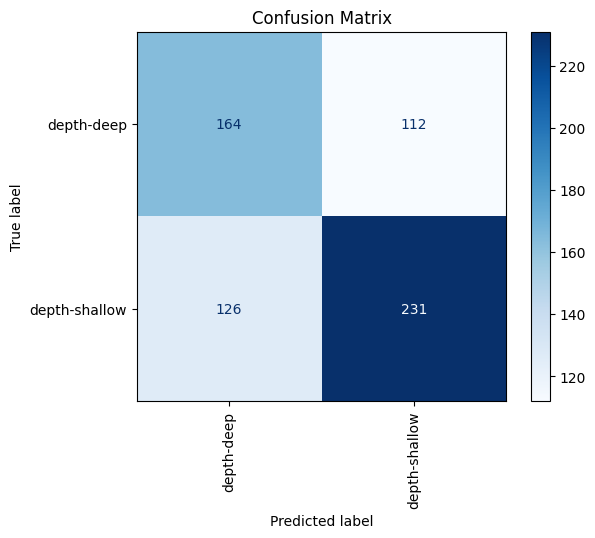

Mean Average Precision (mAP): 0.63
Visualizing predictions vs ground truth for the first image...


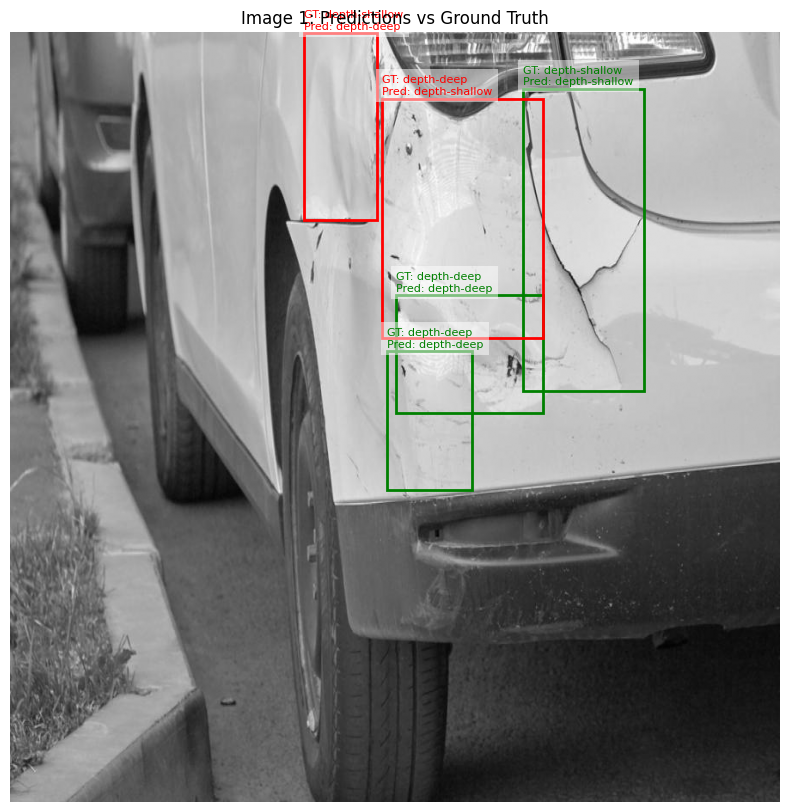

In [14]:
accuracy, report, predictions = model.evaluate(
    test_data['images'],
    test_data['rois'],
    test_data['labels']
)

# **Save Model Weights**

In [17]:
print(hasattr(model, 'booster_'))  # Should return True if the model is trained

False


In [18]:
# Save the model and MultiLabelBinarizer
model.save_model("trained_glcm_model.pkl")

Model and MultiLabelBinarizer saved to trained_glcm_model.pkl


# **Model Testing using Pre-Trained Model Weights**

In [21]:
import sys
from pathlib import Path
import tensorflow as tf
import numpy as np
import sklearn
import pandas as pd
import matplotlib
import cv2
import scipy
from lightgbm import LGBMClassifier
from google.colab import files
import joblib

src_path = Path('/content/GLCM-Classifier/src')
if src_path.exists():
    sys.path.append(str(src_path))

from utils.data_loader import load_data
from config import Config
from glcm_model import GLCMModel

In [37]:
# Create a configuration object for the test set
config = Config(epochs=20, data_path="/content/GroupEGS-Thesis-Dataset")

# Load only the test data
data = load_data(config.data_path, include_labels=["depth-deep", "depth-shallow"])

# Extract the test set
test_data = data["test_data"]
print("Test data loaded successfully.")

# Display sample information about the test set
print("Sample ROIs:", test_data["rois"][:5])
print("Test Labels:", np.unique(test_data["labels"]))
print("Number of Test Images:", len(test_data["images"]))

Test data loaded successfully.
Sample ROIs: [[[597, 66, 140, 351], [342, 1, 85, 217], [449, 306, 171, 137], [438, 371, 99, 161], [432, 77, 188, 279]], [[264, 349, 253, 468]], [[556, 329, 263, 400], [363, 506, 357, 389]], [[226, 708, 47, 48], [171, 211, 160, 278], [335, 268, 433, 413]], [[442, 339, 229, 304], [200, 82, 274, 444], [82, 452, 354, 443], [165, 412, 35, 99]]]
Test Labels: [list(['depth-deep']) list(['depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-shallow', 'depth-shallow', 'depth-deep', 'depth-deep'])
 list(['depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-deep', 'depth-shallow', 'depth-shallow', 'depth-s

/usr/local/lib/python3.11/dist-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [25]:
from google.colab import files
trained_model = GLCMModel(config)

# Upload the file
uploaded = files.upload()  # User uploads the .pkl model file

for filename in uploaded.keys():
  trained_model.load_model(filename)

Saving trained_glcm_model (6).pkl to trained_glcm_model (6) (1).pkl
Model and MultiLabelBinarizer loaded from trained_glcm_model (6) (1).pkl


In [26]:
print(hasattr(trained_model, 'booster_'))  # Should return True if the model is trained

False


Extracting GLCM features for the specified data...


Prediction Progress: 100%|██████████| 251/251 [01:18<00:00,  3.19it/s]


[Debug] Extracted input features shape: (633, 96)
[Debug] Total ROI predictions expected: 633
Test Accuracy: 0.62
Classification Report:
                precision    recall  f1-score   support

   depth-deep       0.57      0.59      0.58       276
depth-shallow       0.67      0.65      0.66       357

     accuracy                           0.62       633
    macro avg       0.62      0.62      0.62       633
 weighted avg       0.63      0.62      0.62       633


Confusion Matrix:


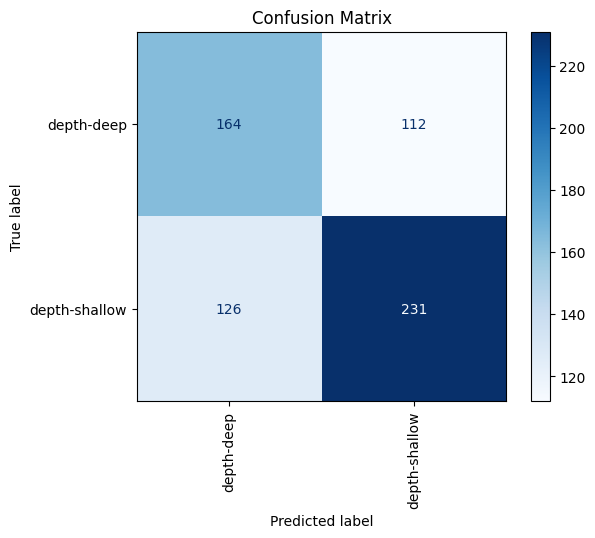

Mean Average Precision (mAP): 0.63
Visualizing predictions vs ground truth for the first image...


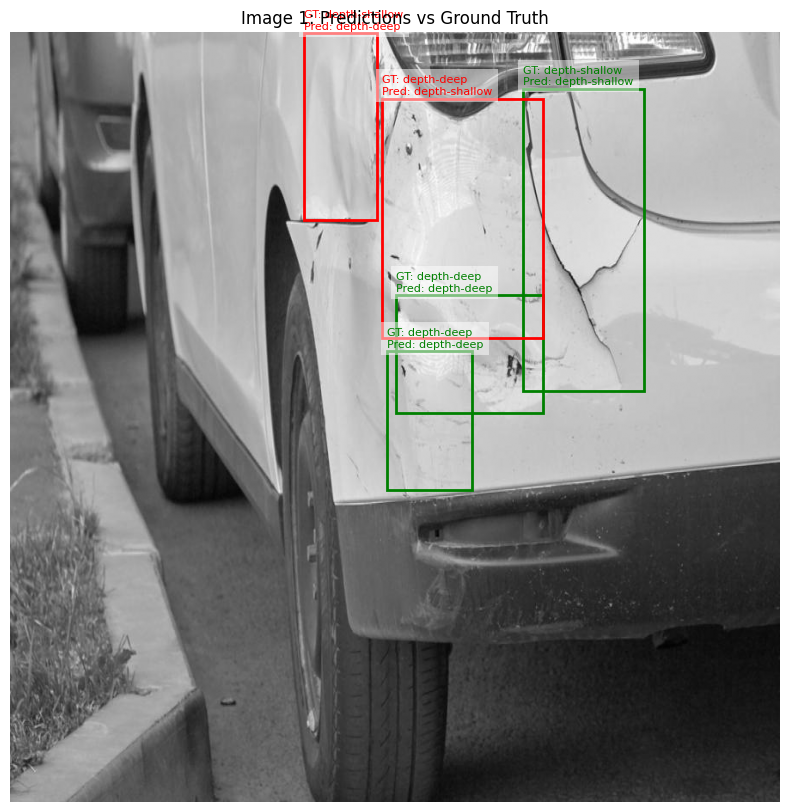

In [27]:
accuracy, report, predictions = trained_model.evaluate(
    test_data['images'],
    test_data['rois'],
    test_data['labels']
)